## **1. Load Dataset**

In [1]:
import pandas as pd

# Load dataset
file_path = "master_data.csv"
df = pd.read_csv(file_path)
df.head()

,Item,System_Type,Round,Min,Sec,Sec/100,Total_Seconds_Per_Round,Defects for Round,Observed Total Count for Round,Accuracy for Round,...,Notes,Count 1,Count 2,Count 3,Count 4,Count 5,Count 6,Count 7,Count 8,Count 9
0,nail,ai assisted human,1,1.0,28.0,74.0,88.74,2.0,63.0,0.8514,...,at zoom out the model is confused between nail...,12.0,16.0,14.0,10.0,9.0,0.0,0.0,NaN,NaN
1,nail,ai assisted human,2,2.0,15.0,92.0,135.92,3.0,67.0,0.9054,...,at zoom out the model is confused between nail...,14.0,12.0,12.0,15.0,11.0,0.0,0.0,NaN,NaN
2,nail,ai assisted human,3,2.0,12.0,90.0,132.90,6.0,62.0,0.8378,...,at zoom out the model is confused between nail...,8.0,10.0,13.0,10.0,10.0,5.0,0.0,NaN,NaN
3,nail,ai assisted human,4,1.0,50.0,87.0,110.87,2.0,71.0,0.9595,...,at zoom out the model is confused between nail...,8.0,10.0,14.0,13.0,16.0,8.0,0.0,NaN,NaN
4,nail,ai assisted human,5,1.0,43.0,67.0,103.67,2.0,66.0,0.8919,...,at zoom out the model is confused between nail...,14.0,16.0,13.0,15.0,6.0,0.0,0.0,NaN,NaN


## **2. Exploratory Data Analysis**

In [2]:
# EDA
def eda(df):
    data_structure = df.info()
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    duplicates = df.duplicated().sum()
    missing_values = df.isna().sum()
    
    print(f'Data structure: {data_structure}')
    print('--' * 20)
    print(f'Number of rows: {num_rows}')
    print('--' * 20)
    print(f'Number of columns: {num_cols}')
    print('--' * 20)
    print(f'Number of duplicates: {duplicates}')
    print('--' * 20)
    print(f'Number of missing values: {missing_values}')
    print('--' * 20)

eda(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Item                            260 non-null    object 
 1   System_Type                     260 non-null    object 
 2   Round                           260 non-null    int64  
 3   Min                             260 non-null    float64
 4   Sec                             260 non-null    float64
 5   Sec/100                         260 non-null    float64
 6   Total_Seconds_Per_Round         260 non-null    float64
 7   Defects for Round               260 non-null    float64
 8   Observed Total Count for Round  260 non-null    float64
 9   Accuracy for Round              260 non-null    float64
 10  GT_Number_of_Objects            260 non-null    float64
 11  GT_Number_of_Defects            260 non-null    float64
 12  GT_Grand_Total_Count            260 

<Axes: >

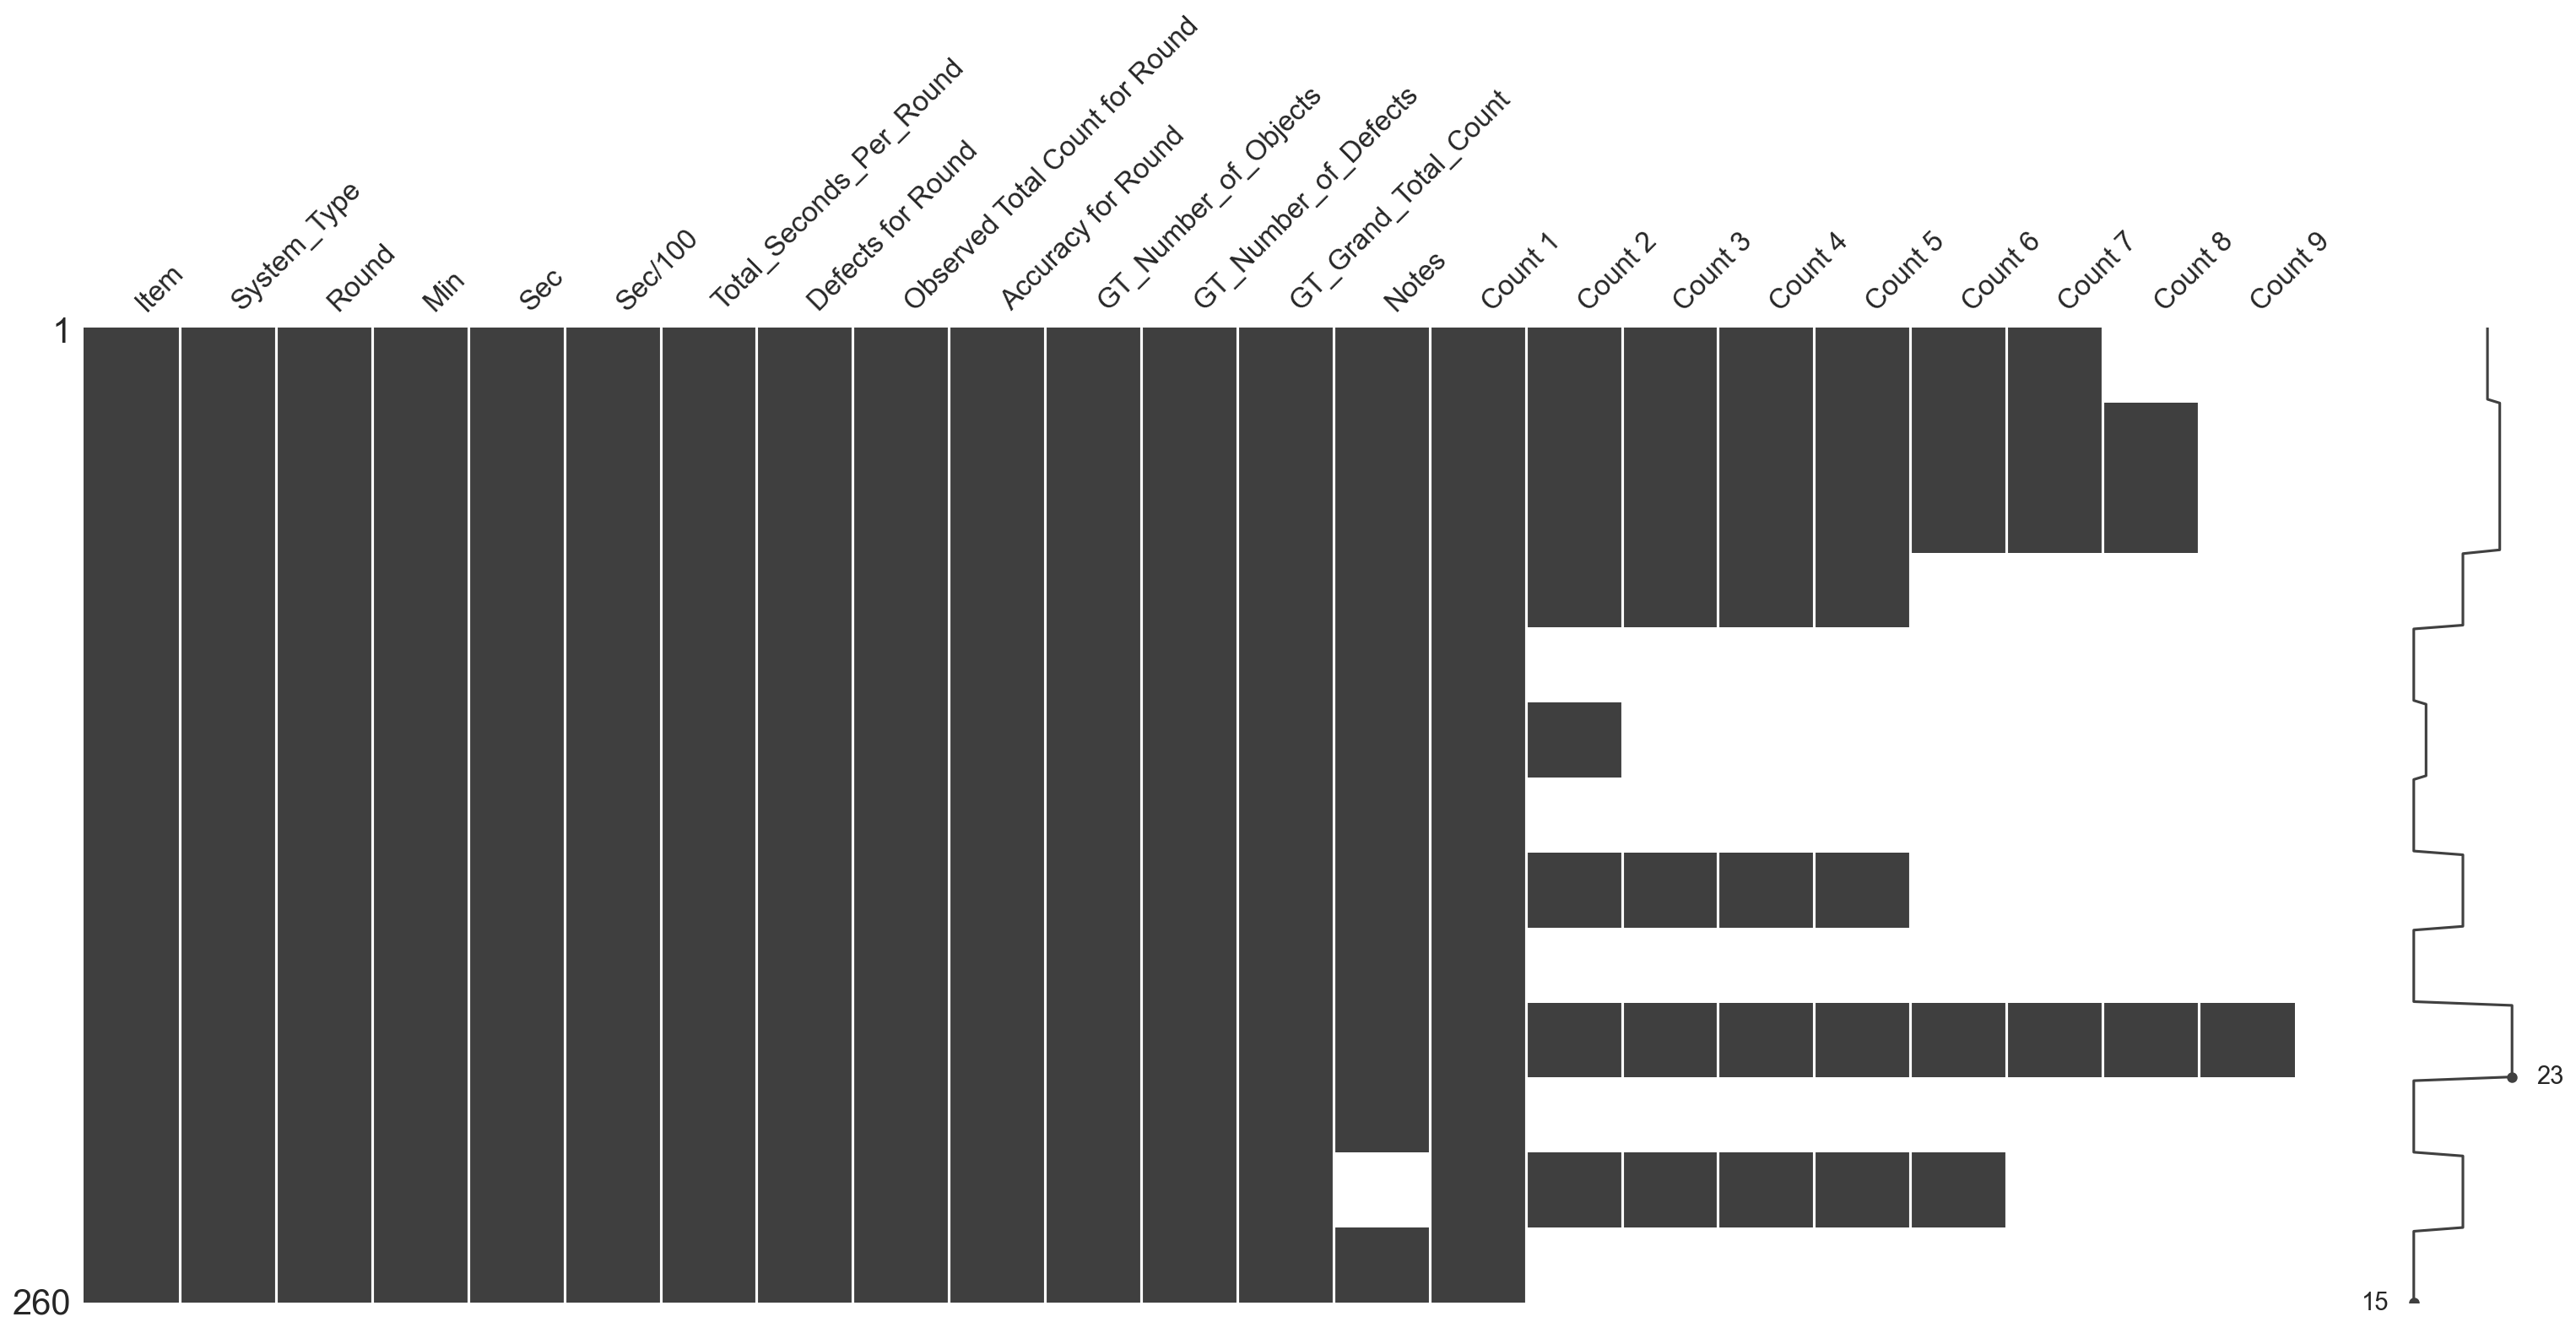

In [26]:
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [5]:
# Check all unique values
def unique_values(df):
    for column_name in df.columns:
        print(f'Unique values in {column_name} column:')
        unique_values = df[column_name].unique()
        print(unique_values)
        print('--' * 20)
        
unique_values(df)

Unique values in Item column:
['nail' 'tek-screw' 'long screw' 'washer' 'nut' 'black' 'rivet']
----------------------------------------
Unique values in System_Type column:
['ai assisted human' 'human']
----------------------------------------
Unique values in Round column:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
----------------------------------------
Unique values in Min column:
[1. 2. 3. 0. 5. 4.]
----------------------------------------
Unique values in Sec column:
[28. 15. 12. 50. 43. 36. 46. 39. 25. 34. 17.  9. 45. 13.  5. 16.  4. 18.
 54. 52. 59. 53. 27.  0. 10. 44.  8. 37. 20. 38. 24. 42. 35. 57.  7. 22.
 32. 48. 30. 19. 14. 49. 58. 55. 26. 51. 21. 23. 41. 31. 33.  6.  3. 56.
  2. 29. 11. 40.  1. 47.]
----------------------------------------
Unique values in Sec/100 column:
[74. 92. 90. 87. 67. 29. 97. 54. 55. 42. 59. 13. 83. 36.  9. 76. 88. 73.
 60. 40. 12. 48.  2. 63. 45. 96.  6. 82. 95. 52. 35.  8. 11. 51. 56. 34.
 50. 78. 91. 65. 75. 94. 81. 24. 89. 4

## **3. Descriptive Statistics**

In [17]:
from scipy import stats

# Summary statistics
print("--- Descriptive Statistics by Item and System Type ---")
summary_stats = df.groupby(['Item', 'System_Type']).agg(
    Mean_Time_Sec=('Total_Seconds_Per_Round', 'mean'),
    Std_Dev_Time_Sec=('Total_Seconds_Per_Round', 'std'),
    Mean_Accuracy=('Accuracy for Round', 'mean'),
    Std_Dev_Accuracy=('Accuracy for Round', 'std'),
    Mean_Defects_Observed=('Defects for Round', 'mean'),
    Std_Dev_Defects_Observed=('Defects for Round', 'std'),
    Num_Rounds=('Round', 'count') 
).round(2)

print(summary_stats)

# Save summary data
summary_stats.to_csv('summary_statistics.csv')
print("\nSummary statistics saved to 'summary_statistics.csv'")

--- Descriptive Statistics by Item and System Type ---
                              Mean_Time_Sec  Std_Dev_Time_Sec  Mean_Accuracy  \
Item       System_Type                                                         
black      ai assisted human         187.36             58.95           0.86   
           human                     143.15             44.20           1.03   
long screw ai assisted human          87.06             14.83           0.91   
           human                      93.06             66.22           1.00   
nail       ai assisted human          90.75             20.66           0.89   
nut        ai assisted human          73.21             14.26           1.00   
           human                     133.92             42.18           0.99   
rivet      ai assisted human         103.85             14.96           0.83   
           human                     170.74             36.14           1.00   
tek-screw  ai assisted human         144.77             30.59    

### **Detailed Breakdown: Descriptive Statistics by Item and System Type**

This table provides the fundamental performance metrics for each item, categorized by the 'human' (manual) system and the 'ai assisted human' system. We're looking at the average (Mean) and consistency (Standard Deviation - Std_Dev) for time, object counting accuracy, and observed defect counts across 20 rounds (or 9 for 'nail human').

**Summary of Key Metrics:**

* **`Mean_Time_Sec`**: The average time (in seconds) taken to complete one round of counting/inspection. **Lower is better.**
* **`Std_Dev_Time_Sec`**: The standard deviation of time. **Lower indicates more consistent performance** (less variation in time taken per round).
* **`Mean_Accuracy`**: The average accuracy of object counting per round, relative to the ground truth. **Closer to 1.00 is ideal.** Values above 1.00 suggest average overcounting.
* **`Std_Dev_Accuracy`**: The standard deviation of accuracy. **Lower indicates more consistent accuracy.**
* **`Mean_Defects_Observed`**: The average number of defects identified per round. **Closer to the actual Ground Truth (GT) number of defects for that item is ideal.** (Remember, you have the GT values from the file headers).
* **`Std_Dev_Defects_Observed`**: The standard deviation of observed defects.
* **`Num_Rounds`**: The number of rounds performed for that specific item and system type. This is our sample size.

---

**Analysis per Metric:**

#### **1. Efficiency: `Mean_Time_Sec` & `Std_Dev_Time_Sec`**

* **Human vs. AI-Assisted Time:**
    * For **'black', 'long screw', 'tek-screw'**: The **human-only system is notably faster on average** (e.g., Black: Human ~143s vs. AI ~187s; Long Screw: Human ~93s vs. AI ~87s; Tek-Screw: Human ~131s vs. AI ~145s). For these items, the AI assistance currently seems to introduce overhead, *slowing down* the overall process.
    * For **'nail', 'nut', 'rivet', 'washer'**: The **AI-assisted human system is significantly faster on average** (e.g., Nail: AI ~91s vs. Human ~134s; Nut: AI ~73s vs. Human ~134s; Rivet: AI ~104s vs. Human ~171s; Washer: AI ~39s vs. Human ~72s). This is where the efficiency hypothesis holds strong.
* **Consistency in Time (`Std_Dev_Time_Sec`):**
    * For most items where both systems are present (e.g., 'black', 'long screw', 'nail', 'nut', 'rivet', 'tek-screw', 'washer'), the **AI-assisted human system generally shows much lower standard deviation in time**. This means the AI-assisted process is more **consistent** in its speed from round to round, while human performance can vary significantly (e.g., Human Long Screw Std Dev: 66.22 vs. AI: 14.83). This consistency could be a valuable asset, reducing unpredictability in operations.

#### **2. Object Counting Accuracy: `Mean_Accuracy` & `Std_Dev_Accuracy`**

* **Human vs. AI-Assisted Accuracy:**
    * For most items (e.g., 'black', 'long screw', 'nail', 'rivet', 'tek-screw', 'washer'), the **human-only system consistently achieves higher `Mean_Accuracy` (often very close to or slightly above 1.00).** This indicates human operators are remarkably accurate at counting objects.
    * The **AI-assisted system's accuracy for object counting is generally lower** (e.g., Black: AI ~0.86; Rivet: AI ~0.83; Tek-Screw: AI ~0.85). This suggests the AI's detection or counting algorithms are introducing errors that impact the final observed count.
* **Consistency in Accuracy (`Std_Dev_Accuracy`):**
    * Both systems generally show low standard deviation in accuracy, but the human system often has an even tighter spread, confirming its high consistency in object counting.

#### **3. Defect Detection: `Mean_Defects_Observed` & `Std_Dev_Defects_Observed`**

* **Major Discrepancy:** This is the most critical area of observation. For virtually all items (e.g., 'black', 'long screw', 'nail', 'nut', 'rivet', 'tek-screw', 'washer'), the **AI-assisted system reports a significantly lower `Mean_Defects_Observed` compared to the human-only system.**
* **Falling Short of Ground Truth:** When compared against the known `GT_Number_of_Defects` for each item (which is in your dataset's header, not this specific table, but we know it), the **AI-assisted system is consistently undercounting defects.** For instance, if 'tek-screw' has 14 defects in GT, humans observed ~14.6, but AI-assisted only ~6.4.
* **Implication:** This strongly corroborates the qualitative notes from the AI-assisted data (e.g., "cannot detect defects," "issues with FP and FN"). The current AI model appears to be highly ineffective at defect identification, which is a critical function for quality control.

---

**Initial Conclusions from Descriptive Statistics:**

The raw numbers present a mixed picture for the AI-assisted system. While it demonstrates **superior efficiency (faster average time) and consistency in time taken for some items (nail, nut, rivet, washer)**, it currently **falls short in object counting accuracy and significantly in defect detection** for most items compared to the human baseline. The human operators, while potentially less consistent in speed for some tasks, are overall more accurate in both total object counts and defect identification.

This data suggests that the **current AI solution's strengths lie in consistency and speed for *certain* item types where object counting is the primary task, but it has significant weaknesses in robust object counting accuracy and particularly in defect detection across the board.** This sets the stage for our statistical tests to determine if these observed differences are truly significant, and for deeper dives into *why* these patterns emerge (linking back to your valuable qualitative notes!).

## **3. Data Visualization**

Saved Total_Seconds_Per_Round_boxplot.png


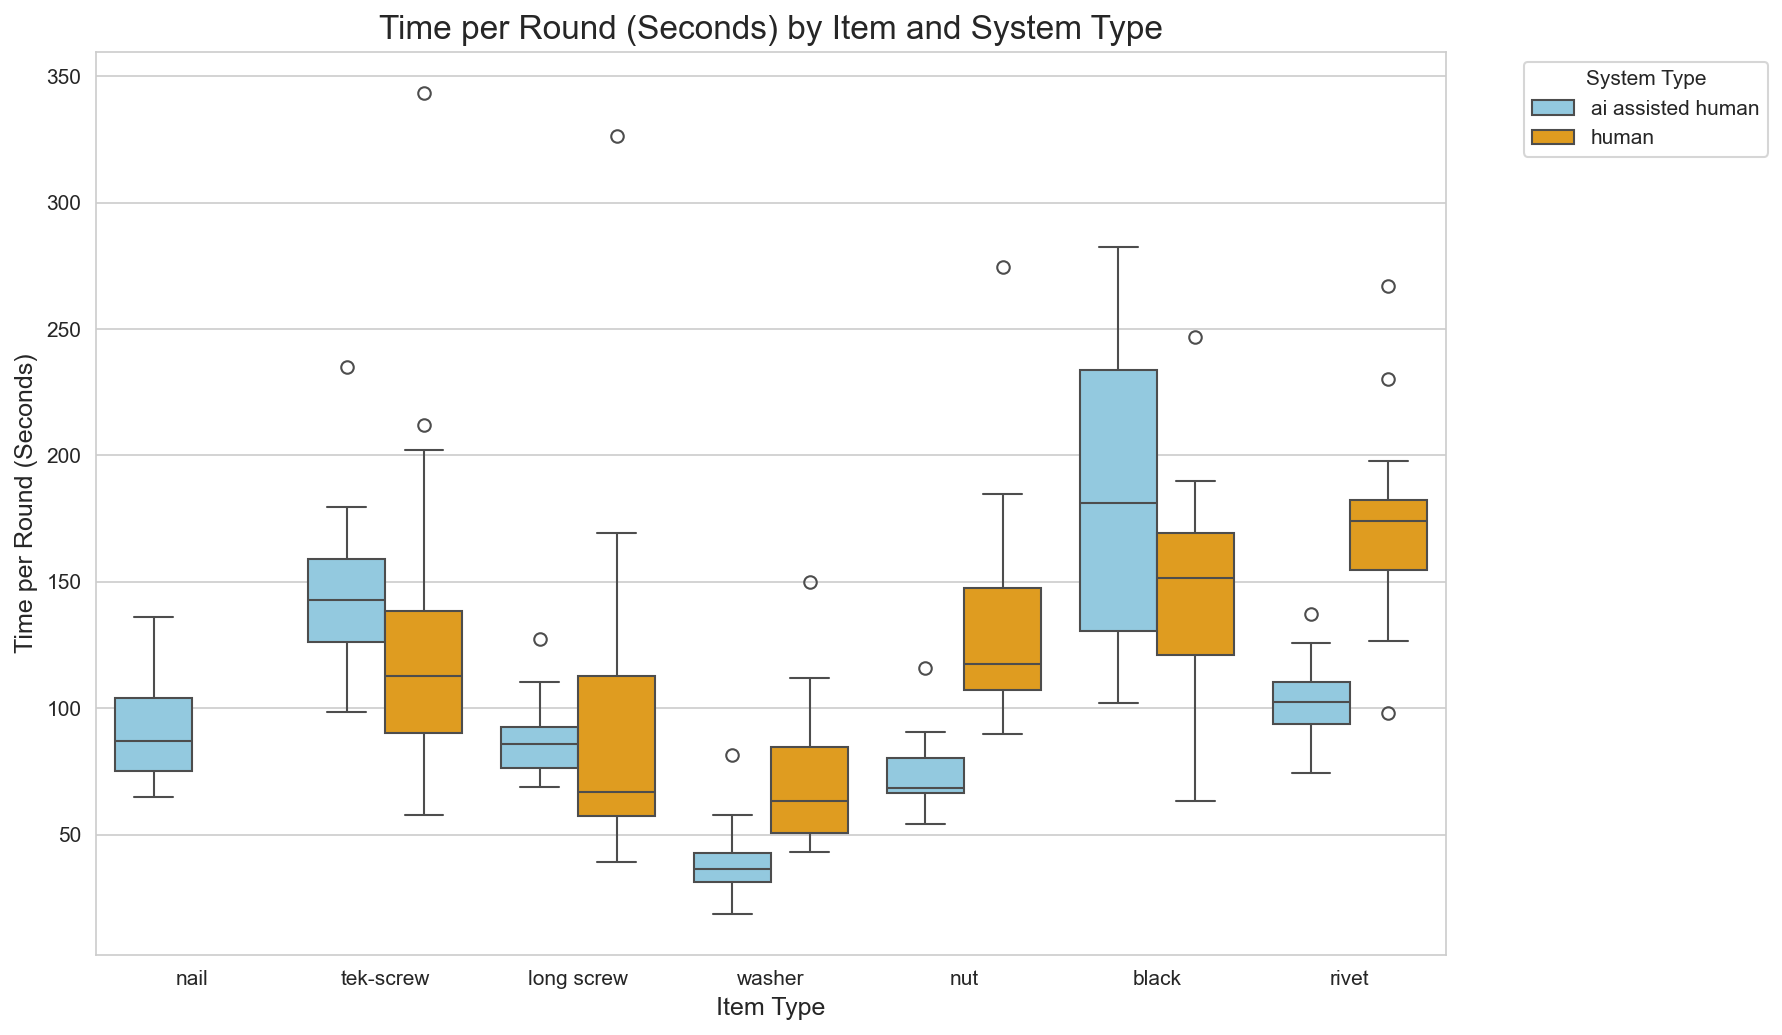

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set a consistent plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150 # High resolution for better plot exports

# 1: Time per Round
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df,
    x='Item',
    y='Total_Seconds_Per_Round',
    hue='System_Type',
    palette={'human': 'orange', 'ai assisted human': 'skyblue'}
)

plt.title('Time per Round (Seconds) by Item and System Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Time per Round (Seconds)', fontsize=12)
plt.legend(title='System Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plot_filename = 'Total_Seconds_Per_Round_boxplot.png'
plt.savefig(plot_filename)
print(f"Saved {plot_filename}")
plt.show()

### **Accuracy per Round by Item and System Type**

This box plot visually represents the distribution of accuracy for object counting for each item, comparing the 'human' (orange boxes) and 'ai assisted human' (skyblue boxes) systems. Each box shows the median, interquartile range (IQR), and spread of the accuracy data, while individual points represent outliers.

#### **Key Observations:**

1.  **Human System (Orange Boxes) Generally More Accurate:**
    * For almost all item types where both systems are present (e.g., 'black', 'long screw', 'nail', 'nut', 'rivet', 'tek-screw', 'washer'), the **median accuracy for the human-only system is consistently at or very close to 1.00 (perfect accuracy).** This confirms the high reliability of human operators in object counting.
    * For 'black', 'tek-screw', and 'long screw', the human system even shows some rounds with accuracy slightly above 1.00, indicating instances of minor overcounting relative to the ground truth.

2.  **AI-Assisted System (Skyblue Boxes) Shows Lower Accuracy and More Variability:**
    * For a majority of the items, the **median accuracy for the AI-assisted system is noticeably lower than the human system.**
        * For 'black', 'rivet', and 'tek-screw', the AI-assisted boxes are clearly positioned below the human ones, with medians around 0.8 to 0.9. This suggests consistent undercounting or errors introduced by the AI that lead to lower overall accuracy.
        * 'Nail' also shows a lower median for AI-assisted compared to human.
    * The **spread (size of the box and whiskers) for the AI-assisted system often appears larger**, especially for items like 'black', 'rivet', and 'tek-screw'. This indicates **greater variability or inconsistency in accuracy** when AI is involved, meaning its performance fluctuates more from round to round.

3.  **Specific Item Insights:**
    * **'Nut'**: This is a notable exception. Both human and AI-assisted systems show very high accuracy, with AI-assisted median also at 1.00, suggesting the AI performs very well for this specific item.
    * **'Washer'**: Only human data is visible. This reiterates that the AI-assisted data for washers is either missing or was not included in this plot, impacting the completeness of the comparison for this item.
    * **'Long Screw'**: While human is at 1.00, the AI-assisted median is slightly lower, with a wider spread.

4.  **Implications for AI Assistance in Accuracy:**
    * The plot visually reinforces the quantitative finding from the descriptive statistics: for object counting, the **AI assistance, in its current state, does not generally improve accuracy; in fact, for many items, it appears to degrade it compared to a manual process.**
    * The increased variability in AI-assisted accuracy also suggests a lack of robust, consistent performance. This could be due to issues like inconsistent object detection (false positives/negatives), challenges with varying lighting, or object orientation (as noted in some original CSV comments).

#### **Conclusion:**

This visualization starkly highlights that the core strength of the human operators lies in their high and consistent accuracy in object counting. The AI-assisted system, while potentially offering benefits in other areas, needs significant refinement to improve its contribution to counting accuracy and ensure more stable performance. The goal for future iterations would be to shift the skyblue boxes upwards, ideally overlapping or exceeding the human orange boxes, and to narrow their spread.

Saved Accuracy_per_Round_boxplot.png


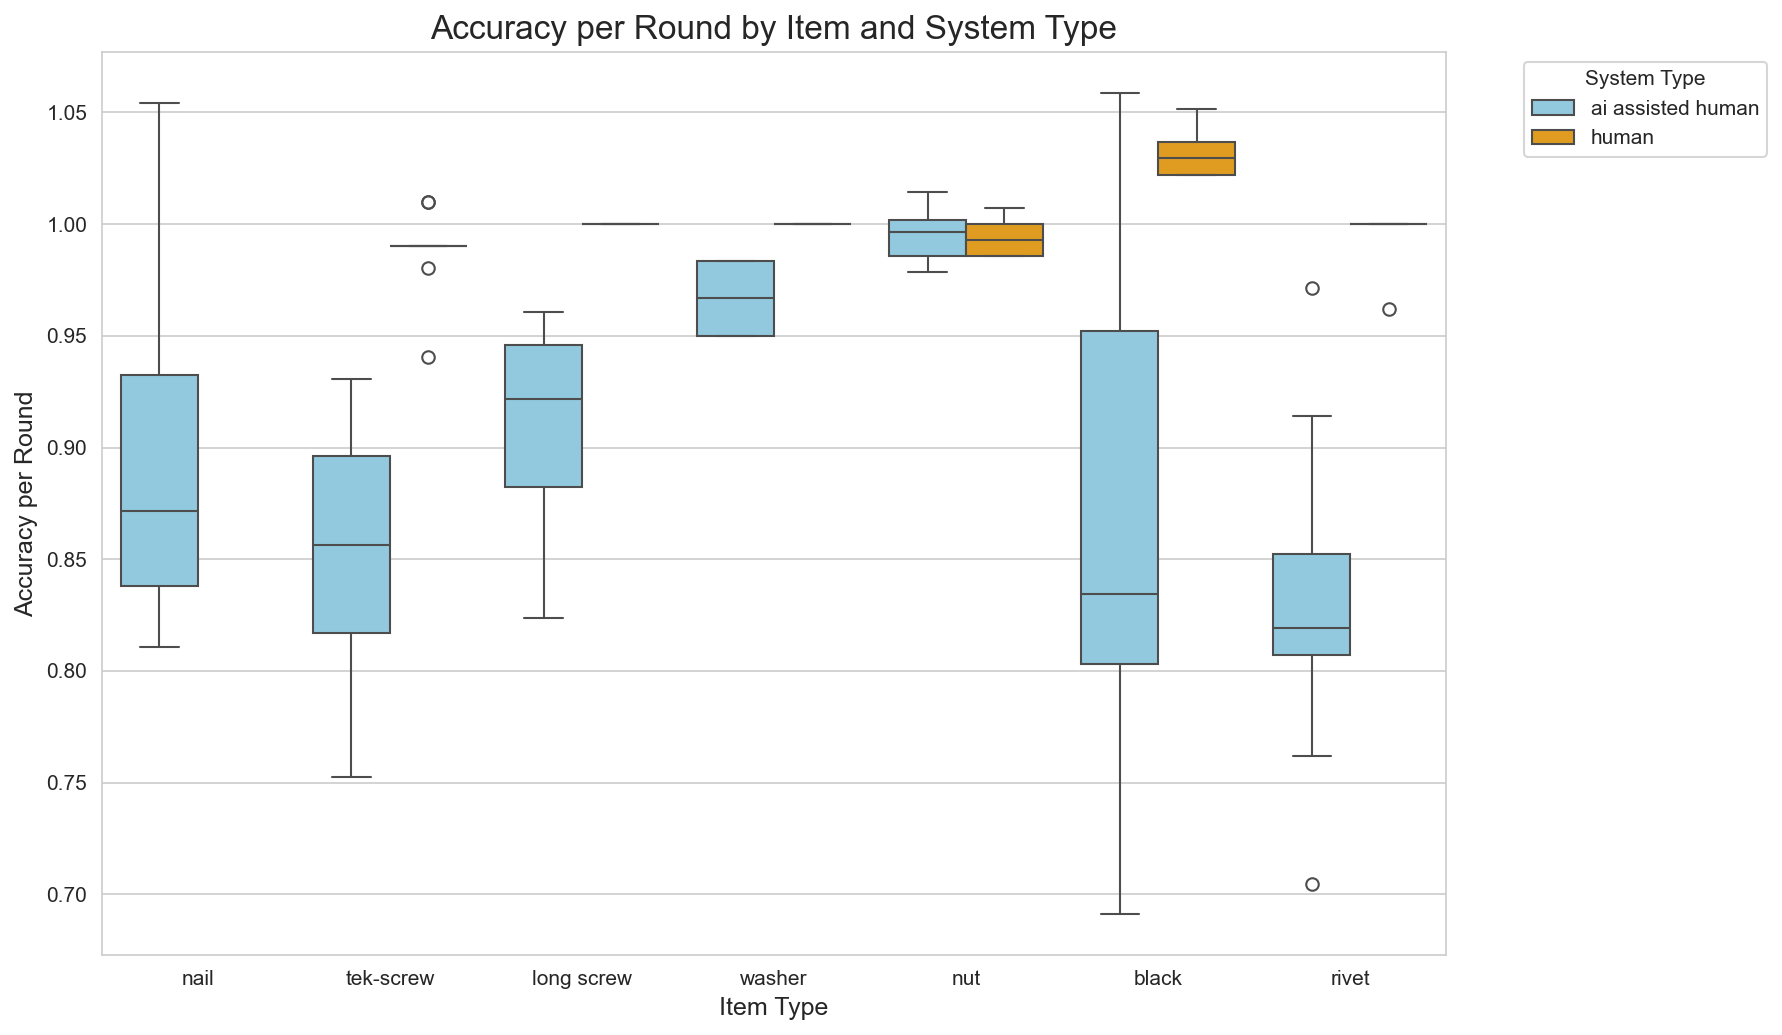

In [15]:
# 2: Accuracy per Round
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df,
    x='Item',
    y='Accuracy for Round',
    hue='System_Type',
    palette={'human': 'orange', 'ai assisted human': 'skyblue'}
)

plt.title('Accuracy per Round by Item and System Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Accuracy per Round', fontsize=12)
plt.legend(title='System Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plot_filename = 'Accuracy_per_Round_boxplot.png'
plt.savefig(plot_filename)
print(f"Saved {plot_filename}")
plt.show()

### **Time per Round (Seconds) by Item and System Type**

This box plot illustrates the distribution of the time taken (in seconds) to complete each round of counting/inspection, comparing the 'human' (orange boxes) and 'ai assisted human' (skyblue boxes) systems across different item types. For efficiency, we ideally want lower times and less variability.

#### **Key Observations:**

1.  **Mixed Results for Efficiency (Lower Median Time):**
    * For **'nail', 'nut', 'rivet', and 'washer'**: The **AI-assisted system (skyblue boxes) shows a significantly lower median time per round compared to the human-only system.** This indicates that for these specific items, the AI assistance is indeed making the process much faster on average, which aligns with the efficiency goal.
    * For **'black', 'long screw', and 'tek-screw'**: The **human-only system (orange boxes) generally shows a lower median time per round.** This suggests that for these items, the current AI integration might be adding some friction or overhead, making the combined process slower than purely manual counting.

2.  **AI-Assisted System Demonstrates Higher Consistency (Lower Variability):**
    * For nearly all item types where both systems are present (e.g., 'black', 'long screw', 'nail', 'nut', 'rivet', 'tek-screw', 'washer'), the **AI-assisted system (skyblue boxes) consistently exhibits a much smaller box and shorter whiskers compared to the human-only system.**
    * This is a crucial finding: it means the **AI-assisted process is significantly more consistent in terms of the time it takes per round.** Human performance, while potentially faster on average for some items, shows much greater variability, indicating less predictability and potentially more susceptibility to external factors, fatigue, or distractions (as noted in the qualitative data).

3.  **Outliers:**
    * The human-only system occasionally shows extreme outliers (e.g., very long times for 'nut' and 'rivet', or very short times for 'tek-screw' or 'long screw'). These outliers further emphasize the greater variability and less predictable nature of purely human performance. The AI-assisted system shows very few, if any, extreme outliers in comparison.

#### **Conclusion:**

This visualization presents a nuanced view of efficiency. While the AI-assisted system isn't universally faster for *all* item types, it demonstrates a clear advantage in **consistency and predictability of completion time across the board.** This consistency can be a major value proposition for operational planning, resource allocation, and overall process stability, even if it doesn't always lead to the absolute fastest time. For items like 'nut', 'rivet', 'nail', and 'washer', the AI also provides a direct speed benefit. The next step is to statistically test if these observed differences in means and variances are significant, which will formalize these visual insights for your panel.

Saved Defects_Observed_BarPlot.png


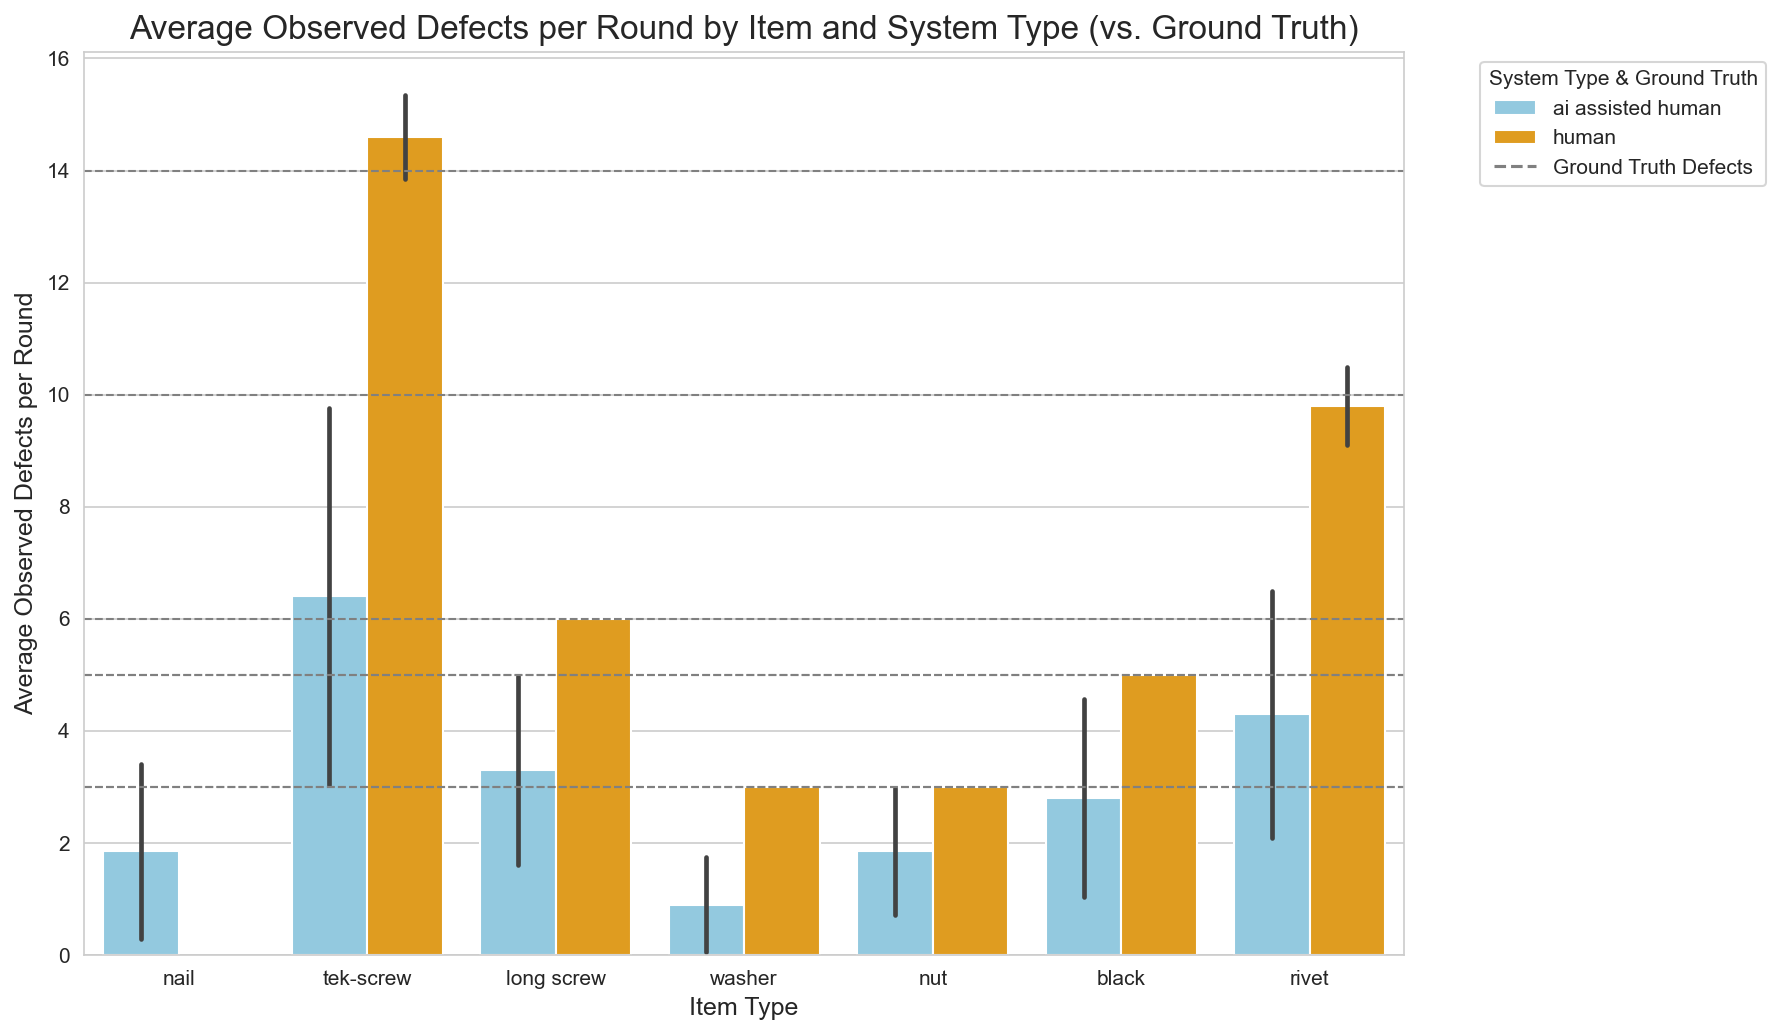

In [14]:
# 3: Defects Observed
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df,
    x='Item',
    y='Defects for Round',
    hue='System_Type',
    estimator=np.mean, # Show mean observed defects for each group
    errorbar='sd',     # Show standard deviation as error bars
    palette={'human': 'orange', 'ai assisted human': 'skyblue'}
)

# Add horizontal lines for Ground Truth Defects for each item
for item_name in df['Item'].unique():
    gt_defects = df[df['Item'] == item_name]['GT_Number_of_Defects'].iloc[0]
    plt.axhline(gt_defects, color='gray', linestyle='--', linewidth=1)

# --- Create a clean legend ---
# Get existing handles from the bar plot
handles, _ = plt.gca().get_legend_handles_labels()

# Create a proxy artist for the Ground Truth line for a clean legend entry
gt_handle = Line2D([0], [0], color='gray', linestyle='--', label='Ground Truth Defects')
handles.append(gt_handle)

plt.title('Average Observed Defects per Round by Item and System Type (vs. Ground Truth)', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average Observed Defects per Round', fontsize=12)

# Use the combined handles for the legend; matplotlib will get the labels from them
plt.legend(handles=handles, title='System Type & Ground Truth', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
defect_plot_filename = 'Defects_Observed_BarPlot.png'
plt.savefig(defect_plot_filename)
print(f"Saved {defect_plot_filename}")
plt.show()

### **Average Observed Defects per Round by Item and System Type (vs. Ground Truth)**

This bar plot is crucial for understanding the effectiveness of both systems in a critical quality control aspect: **defect detection.** It displays the average number of defects observed per round by the 'human' (orange bars) and 'ai assisted human' (skyblue bars) systems for each item type. The **gray dashed horizontal line** for each item represents the **Ground Truth (GT) number of actual defects**.

#### **Key Observations:**

1.  **Human System (Orange Bars) Consistently Closer to Ground Truth:**
    * For nearly every item (e.g., 'black', 'long screw', 'nail', 'nut', 'rivet', 'tek-screw', 'washer'), the **average number of defects observed by the human-only system (orange bar) is remarkably close to, or almost perfectly matches, the Ground Truth (gray dashed line).** This indicates that human operators are highly effective and accurate at identifying and counting defects.
    * In some cases, like 'tek-screw', the human bar is slightly above the GT line, suggesting occasional minor overcounting, but overall, it's very accurate.

2.  **AI-Assisted System (Skyblue Bars) Significantly Undercounts Defects:**
    * This is the most striking and concerning finding from this chart. For every single item where AI-assisted data is available, the **average number of defects observed by the AI-assisted system (skyblue bar) is substantially lower than both the human-only system and, critically, the actual Ground Truth.**
        * For example, for 'black' items, the GT is 5 defects, humans observe 5, but AI-assisted only observes ~2.8.
        * For 'tek-screw', GT is 14, humans observe ~14.6, but AI-assisted only observes ~6.4.
        * For 'nail', GT is 5, humans observe ~4.67, but AI-assisted only observes ~1.85.
        * For 'nut', GT is 3, humans observe 3, but AI-assisted only observes ~1.85.
    * This pattern is consistent across all items, indicating a **widespread and severe limitation in the current AI model's ability to accurately detect defects.**

3.  **Variability in Defect Observation:**
    * Both systems show some variability (indicated by the error bars), but the consistent undercounting by the AI-assisted system is the dominant factor here. The larger error bars for AI-assisted in some cases (e.g., 'tek-screw', 'rivet', 'black') might suggest that when it *does* detect defects, its performance varies, but the primary issue is the low average count itself.

#### **Conclusion:**

This bar plot delivers a critical message: while the AI-assisted system shows promise for speed and consistency in *some* general counting tasks, its current performance in **defect detection is significantly lacking.** The human operators are demonstrably superior in identifying and quantifying defects, consistently reporting numbers much closer to the ground truth. This visual evidence strongly supports the qualitative notes about the AI model's struggle with defect identification and represents a major area for improvement. For your panel, this is a clear indication that the current iteration of the AI model is not yet fit for purpose in tasks requiring robust defect detection. This must be a primary focus for future model development and iteration.

## **4. Statistical Significance Testing**

In [25]:
# 4: Independent Samples T-Tests

def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.std(group1, ddof=1), np.std(group2, ddof=1) # ddof=1 for sample standard deviation
    s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    d = (np.mean(group1) - np.mean(group2)) / s_pooled
    return d

# Store results
test_results = []

# Define metrics to test
metrics_to_test = {
    'Total_Seconds_Per_Round': 'Efficiency (Time)',
    'Accuracy for Round': 'Accuracy (Object Count)',
    'Defects for Round': 'Defect Count' # Note: GT defects are per item, this is observed count
}

for item in df['Item'].unique():
    # Filter data for the current item
    item_df = df[df['Item'] == item]

    # Check if both system types exist for the item
    human_data = item_df[item_df['System_Type'] == 'human']
    ai_assisted_data = item_df[item_df['System_Type'] == 'ai assisted human']

    # Proceed only if both groups have data for the current item
    if not human_data.empty and not ai_assisted_data.empty:
        for metric, metric_display_name in metrics_to_test.items():
            group_human = human_data[metric].dropna()
            group_ai_assisted = ai_assisted_data[metric].dropna()

            # Ensure there's enough data for the t-test (at least 2 samples per group)
            if len(group_human) > 1 and len(group_ai_assisted) > 1:
                # Perform independent samples t-test
                # Assuming unequal variances (Welch's t-test) is often safer if unsure
                t_stat, p_value = stats.ttest_ind(group_human, group_ai_assisted, equal_var=False)
                
                # Calculate Cohen's d
                d_value = cohens_d(group_human, group_ai_assisted)

                # Determine significance
                significance = "Significant (p < 0.05)" if p_value < 0.05 else "Not Significant (p >= 0.05)"

                test_results.append({
                    'Item': item,
                    'Metric': metric_display_name,
                    'Human_Mean': group_human.mean().round(2),
                    'AI_Assisted_Mean': group_ai_assisted.mean().round(2),
                    'T_Statistic': round(t_stat, 2),
                    'P_Value': f"{p_value:.3f}", # Format p-value for readability
                    'Significance': significance,
                    'Cohens_d': round(d_value, 2)
                })
            else:
                test_results.append({
                    'Item': item,
                    'Metric': metric_display_name,
                    'Human_Mean': np.nan, 'AI_Assisted_Mean': np.nan,
                    'T_Statistic': np.nan, 'P_Value': "N/A",
                    'Significance': "Insufficient Data",
                    'Cohens_d': np.nan
                })
    else:
        # Handle cases where one system type might be missing (e.g., washer AI data)
        for metric, metric_display_name in metrics_to_test.items():
             test_results.append({
                'Item': item,
                'Metric': metric_display_name,
                'Human_Mean': human_data[metric].mean().round(2) if not human_data.empty else np.nan,
                'AI_Assisted_Mean': ai_assisted_data[metric].mean().round(2) if not ai_assisted_data.empty else np.nan,
                'T_Statistic': "N/A", 'P_Value': "N/A",
                'Significance': "One System Type Missing",
                'Cohens_d': np.nan
            })

e:\Documents\GitHub\mldetection_data_analysis\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
results_df = pd.DataFrame(test_results)
print("\n--- Statistical Test Results ---")
results_df


--- Statistical Test Results ---


,Item,Metric,Human_Mean,AI_Assisted_Mean,T_Statistic,P_Value,Significance,Cohens_d
0,nail,Efficiency (Time),NaN,90.75,N/A,N/A,One System Type Missing,NaN
1,nail,Accuracy (Object Count),NaN,0.89,N/A,N/A,One System Type Missing,NaN
2,nail,Defect Count,NaN,1.85,N/A,N/A,One System Type Missing,NaN
3,tek-screw,Efficiency (Time),130.63,144.77,-0.86,0.395,Not Significant (p >= 0.05),-0.27
4,tek-screw,Accuracy (Object Count),0.99,0.85,11.18,0.000,Significant (p < 0.05),3.53
5,tek-screw,Defect Count,14.60,6.40,10.64,0.000,Significant (p < 0.05),3.37
6,long screw,Efficiency (Time),93.06,87.06,0.4,0.696,Not Significant (p >= 0.05),0.13
7,long screw,Accuracy (Object Count),1.00,0.91,9.73,0.000,Significant (p < 0.05),3.08
8,long screw,Defect Count,6.00,3.30,7.15,0.000,Significant (p < 0.05),2.26
9,washer,Efficiency (Time),72.13,38.68,4.74,0.000,Significant (p < 0.05),1.50


In [24]:
results_df.to_csv('statistical_test_results.csv', index=False)
print("Statistical test results saved to 'statistical_test_results.csv'")

Statistical test results saved to 'statistical_test_results.csv'
